In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
from google.colab import files
upload = files.upload()


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [ ]:
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Education_Level,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6517.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,1.705693,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,0.779920,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,1.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,1.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,2.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,2.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,3.000000,101.000000


In [ ]:
df_clean = df.dropna()

In [ ]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0])

In [ ]:
print(df.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
Sleep_Group                    0
Attendance_Group               0
dtype: int64


In [ ]:
numerical = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Sleep_Hours',
    'Tutoring_Sessions',
    'Physical_Activity',
    'Exam_Score'
]

for column in numerical:
    print(f"Column: {column}")
    data = np.array(df[column], dtype=np.float64)
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Minimum: {np.min(data):.2f}")
    print(f"Maximum: {np.max(data):.2f}")
    print(f"Standard Deviation: {np.std(data):.2f}")
    print()


Column: Attendance
Mean: 79.98
Median: 80.00
Minimum: 60.00
Maximum: 100.00
Standard Deviation: 11.55

Column: Hours_Studied
Mean: 19.98
Median: 20.00
Minimum: 1.00
Maximum: 44.00
Standard Deviation: 5.99

Column: Previous_Scores
Mean: 75.07
Median: 75.00
Minimum: 50.00
Maximum: 100.00
Standard Deviation: 14.40

Column: Sleep_Hours
Mean: 7.03
Median: 7.00
Minimum: 4.00
Maximum: 10.00
Standard Deviation: 1.47

Column: Tutoring_Sessions
Mean: 1.49
Median: 1.00
Minimum: 0.00
Maximum: 8.00
Standard Deviation: 1.23

Column: Physical_Activity
Mean: 2.97
Median: 3.00
Minimum: 0.00
Maximum: 6.00
Standard Deviation: 1.03

Column: Exam_Score
Mean: 67.24
Median: 67.00
Minimum: 55.00
Maximum: 101.00
Standard Deviation: 3.89



# **Hypothesis Test 2**

In [ ]:
# We’ll split students into High Attendance and Low Attendance based on a cutoff 90%
# Create Attendance Group
df['Attendance_Group'] = df['Attendance'].apply(lambda x: 'High' if x >= 90 else 'Low')

In [ ]:
# Check group sizes
print(df['Attendance_Group'].value_counts())

# Group means
print(df.groupby('Attendance_Group')['Exam_Score'].mean())

Attendance_Group
Low     4861
High    1746
Name: count, dtype: int64
Attendance_Group
High    70.142612
Low     66.191524
Name: Exam_Score, dtype: float64


In [ ]:
# Separate the groups
high_attendance = df[df['Attendance_Group'] == 'High']['Exam_Score']
low_attendance = df[df['Attendance_Group'] == 'Low']['Exam_Score']

# Welch's t-test (assumes unequal variance)
t_stat, p_value = stats.ttest_ind(high_attendance, low_attendance, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 42.01984654516184
P-value: 4.990010548548937e-309


We want to determine whether students' attendance has a statistically significant effect on their exam performance.

- **Null Hypothesis (H₀):** Attendance has no significant effect on exam scores. That means students with high attendance and low attendance perform similarly on exams.
- **Alternative Hypothesis (H₁):** Attendance has a significant effect on exam scores. That means there is a meaningful difference in exam scores between students who attend regularly and those who do not.

In [ ]:
# Use significance level alpha = 0.05
# If p-value is less than 0.05, we reject the null hypothesis (i.e., attendance matters)
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Attendance level has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of attendance level on exam scores.")

Reject H₀: Attendance level has a significant effect on exam scores.


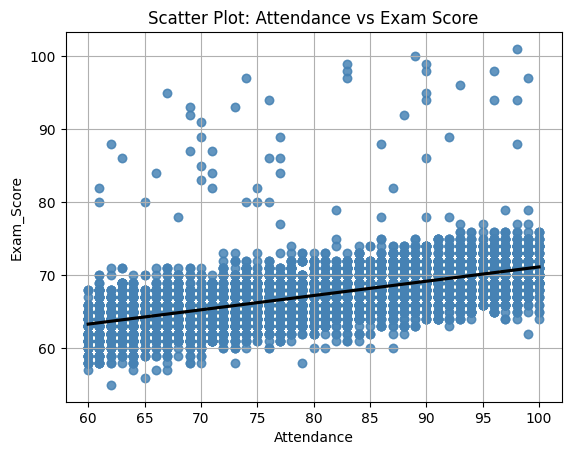

In [ ]:
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.6, color='steelblue')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.title('Scatter Plot: Attendance vs Exam Score')
plt.grid(True)
sns.regplot(
    x='Attendance',
    y='Exam_Score',
    data=df,
    scatter_kws={'alpha': 0.6, 'color': 'steelblue'},
    line_kws={'color':'black'}
)
plt.show()

In [ ]:
# Sample means
mean_high = np.mean(high_attendance)
mean_low = np.mean(low_attendance)

# Sample sizes
n_high = len(high_attendance)
n_low = len(low_attendance)

# Sample standard deviations
std_high = np.std(high_attendance, ddof=1)
std_low = np.std(low_attendance, ddof=1)

# Standard error of the difference
se_diff = np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Mean difference
mean_diff = mean_high - mean_low

# Degrees of freedom (Welch-Satterthwaite equation)
df = ((std_high**2 / n_high) + (std_low**2 / n_low))**2 / \
     ((std_high**2 / n_high)**2 / (n_high - 1) + (std_low**2 / n_low)**2 / (n_low - 1))

# t critical value for 95% CI
t_crit = stats.t.ppf(0.975, df)

# Confidence interval
ci_low = mean_diff - t_crit * se_diff
ci_high = mean_diff + t_crit * se_diff

print(f"95% Confidence Interval for the mean difference: ({ci_low:.2f}, {ci_high:.2f})")

95% Confidence Interval for the mean difference: (3.77, 4.14)


### Final Conclusion: Attendance and Academic Performance

To investigate the impact of attendance on exam performance, students were divided into two groups:
- **High Attendance** (≥ 90%)
- **Low Attendance** (< 90%)

A Welch’s t-test was conducted to test the following hypotheses:

- **Null Hypothesis (H₀):** Attendance has no significant effect on exam scores.
- **Alternative Hypothesis (H₁):** Attendance has a significant effect on exam scores.

The results showed:

- **Mean Exam Score** for High Attendance: 70.14  
- **Mean Exam Score** for Low Attendance: 66.19  
- **T-statistic:** 42.02  
- **P-value:** ~0.000

Since the p-value is far below the significance level of 0.05, we **reject the null hypothesis**. This provides strong evidence that attendance significantly affects academic performance.

Additionally, a **95% confidence interval** was calculated for the difference in mean scores between the two groups. The interval was:

- **CI:** (3.77, 4.14)

This means we are 95% confident that students with high attendance score between X and Y points higher than those with low attendance, reinforcing the conclusion that better attendance is associated with better academic performance.


# **Hypothesis Test 3**

# Previous Scores and Current Performance

In [ ]:
median_score = data['Previous_Scores'].median()
data['Score_Group'] = np.where(data['Previous_Scores'] >= median_score, 'High', 'Low')

# Separate groups
high_group = data[data['Score_Group'] == 'High']['Exam_Score']
low_group = data[data['Score_Group'] == 'Low']['Exam_Score']

# Run independent t-test
t_stat, p_value = stats.ttest_ind(high_group, low_group, equal_var=False)  # Welch's t-test

# Output results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Previous scores have a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of previous scores on exam scores.")

# Scatter plot
plt.scatter(data['Previous_Score'], data['Exam_Score'], alpha=0.7, color='teal')
plt.xlabel('Previous Score')
plt.ylabel('Exam Score')
plt.title('Previous Score vs Exam Score')
plt.grid(True)
plt.show()

# **Hypothesis Test 4**

# Sleep Duration and Academic Performance

In [ ]:
# Create a new column for sleep group
df['Sleep_Group'] = df['Sleep_Hours'].apply(lambda x: 'Optimal' if 7 <= x <= 9 else 'Non-Optimal')


In [ ]:
# Check group sizes
df['Sleep_Group'].value_counts()

# Group means
df.groupby('Sleep_Group')['Exam_Score'].mean()


,Exam_Score
Sleep_Group,
Non-Optimal,67.264487
Optimal,67.215837


In [ ]:
# Separate the groups
optimal = df[df['Sleep_Group'] == 'Optimal']['Exam_Score']
non_optimal = df[df['Sleep_Group'] == 'Non-Optimal']['Exam_Score']

# Run independent t-test
t_stat, p_value = stats.ttest_ind(optimal, non_optimal, equal_var=False)  # Welch's t-test is safer

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.4978366095585833
P-value: 0.6186183513857841


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H₀: Sleep duration has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of sleep duration on exam scores.")


Fail to reject H₀: No significant effect of sleep duration on exam scores.


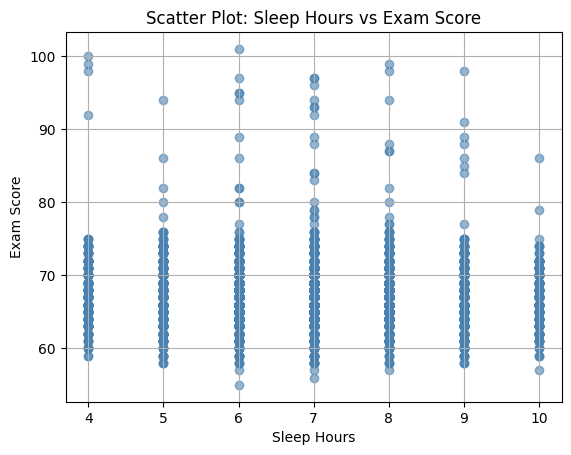

In [ ]:

plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.6, color='steelblue')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Scatter Plot: Sleep Hours vs Exam Score')
plt.grid(True)
plt.show()


# **Hypothesis Test 10**

In [ ]:
# Group means
print(df.groupby('Gender')['Exam_Score'].mean())

Gender
Female    67.244898
Male      67.228894
Name: Exam_Score, dtype: float64


In [ ]:
# Separate scores by gender
male_scores = df[df['Gender'] == 'Male']['Exam_Score']
female_scores = df[df['Gender'] == 'Female']['Exam_Score']

t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.16330225057494885
P-value: 0.8702861976293264


- **Null Hypothesis (H₀):** Gender has no significant effect on exam scores.
- **Alternative Hypothesis (H₁):** Gender has a significant effect on exam scores.


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Gender has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of gender on exam scores.")

Fail to reject H₀: No significant effect of gender on exam scores.


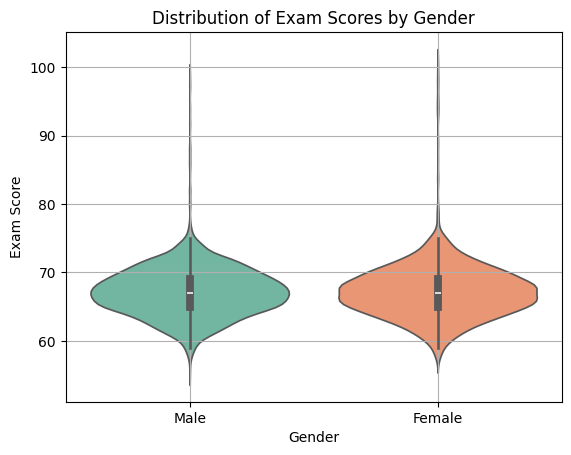

In [ ]:
#create a violin plot
sns.violinplot(x='Gender', y='Exam_Score', hue='Gender', data=df, palette='Set2', legend=False)

plt.title("Distribution of Exam Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

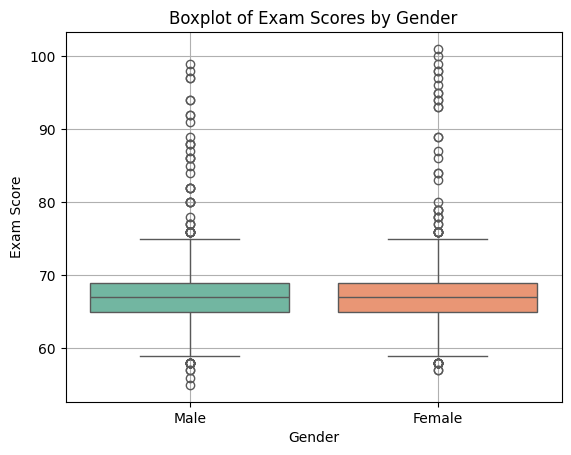

In [ ]:
sns.boxplot(x='Gender', y='Exam_Score', hue='Gender', data=df, palette='Set2', legend=False)

plt.title("Boxplot of Exam Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

### Final Conclusion: Gender and Academic Performance

An independent samples t-test was conducted to determine whether there is a significant difference in exam scores between male and female students.

- **Mean Exam Score (Female):** 67.24  
- **Mean Exam Score (Male):** 67.23  
- **T-statistic:** -0.16  
- **P-value:** 0.87

Since the p-value is **greater than** the significance level (α = 0.05), we **fail to reject the null hypothesis**.

**Conclusion:** There is no statistically significant difference in exam performance between male and female students. This suggests that gender does not play a meaningful role in influencing exam scores in this dataset.


# **Hypothesis Test 11**

In [ ]:
print(df.groupby('School_Type')['Exam_Score'].mean())

School_Type
Private    67.287705
Public     67.212919
Name: Exam_Score, dtype: float64


In [ ]:
public_scores = df[df['School_Type'] == 'Public']['Exam_Score']
private_scores = df[df['School_Type'] == 'Private']['Exam_Score']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(public_scores, private_scores, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.7231134142459056
P-value: 0.46965378222886855


- **Null Hypothesis (H₀):** School type has no effect on exam performance.
- **Alternative Hypothesis (H₁):** Exam scores differ based on school type.

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: School type has a significant effect on exam scores.")
else:
    print("Fail to reject H₀: No significant effect of school type on exam scores.")

Fail to reject H₀: No significant effect of school type on exam scores.


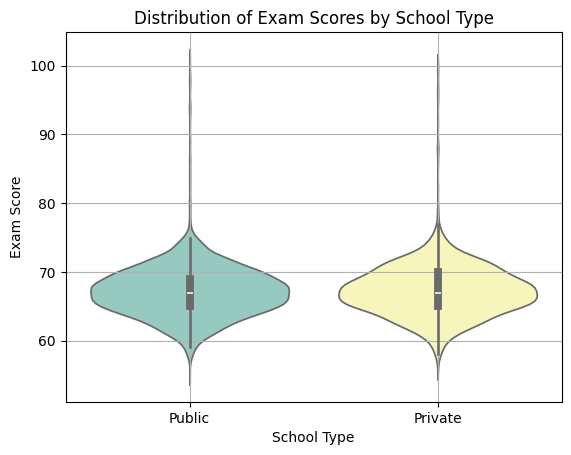

In [ ]:
sns.violinplot(x='School_Type', y='Exam_Score', hue='School_Type', data=df, palette='Set3', legend=False)
plt.title("Distribution of Exam Scores by School Type")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

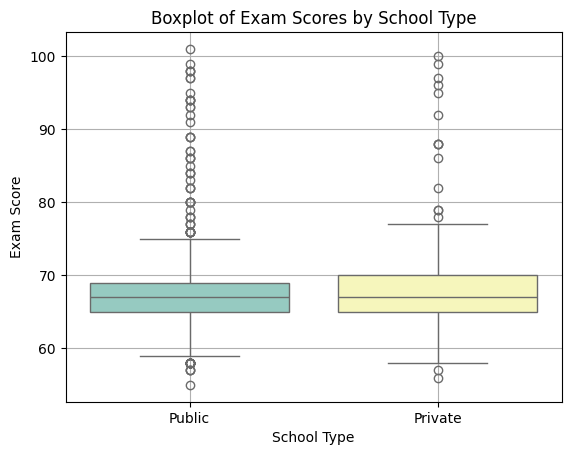

In [ ]:
sns.boxplot(x='School_Type', y='Exam_Score', hue='School_Type', data=df, palette='Set3', legend=False)
plt.title("Boxplot of Exam Scores by School Type")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

### Final Conclusion: School Type and Academic Performance

An independent samples t-test was conducted to assess whether students’ exam scores differ based on school type (Public vs Private).

- **Mean Exam Score (Private):** 67.29  
- **Mean Exam Score (Public):** 67.21  
- **T-statistic:** -0.72  
- **P-value:** 0.47

Since the p-value is **greater than** the significance threshold (α = 0.05), we **fail to reject the null hypothesis**.

**Conclusion:** There is no statistically significant difference in exam scores between students attending public and private schools. This suggests that, in this dataset, school type does not have a meaningful impact on academic performance.


# **Hypothesis Test 12**

In [ ]:
print(df.groupby('Parental_Involvement')['Exam_Score'].mean())

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64


In [ ]:
# Separate exam scores by level of parental involvement
low = df[df['Parental_Involvement'] == 'Low']['Exam_Score']
medium = df[df['Parental_Involvement'] == 'Medium']['Exam_Score']
high = df[df['Parental_Involvement'] == 'High']['Exam_Score']

# Run ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 84.48765484606227
P-value: 5.875479153325444e-37



- **H₀:** Parental involvement does not affect exam performance.
- **H₁:** Exam scores vary based on parental involvement level.

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Parental involvement significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of parental involvement on exam scores.")

Reject H₀: Parental involvement significantly affects exam scores.


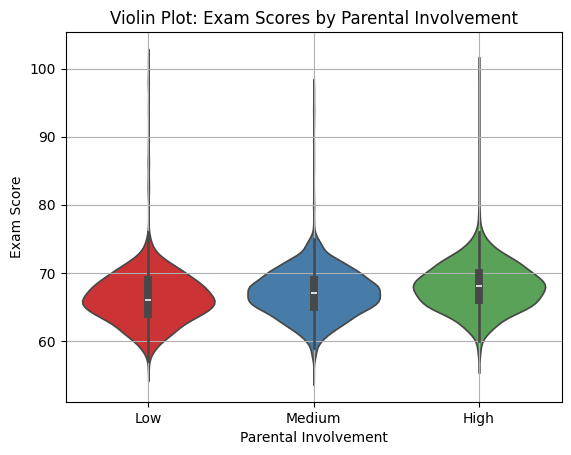

In [ ]:
sns.violinplot(x='Parental_Involvement', y='Exam_Score', hue='Parental_Involvement', data=df,
               palette='Set1', legend=False)
plt.title("Violin Plot: Exam Scores by Parental Involvement")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

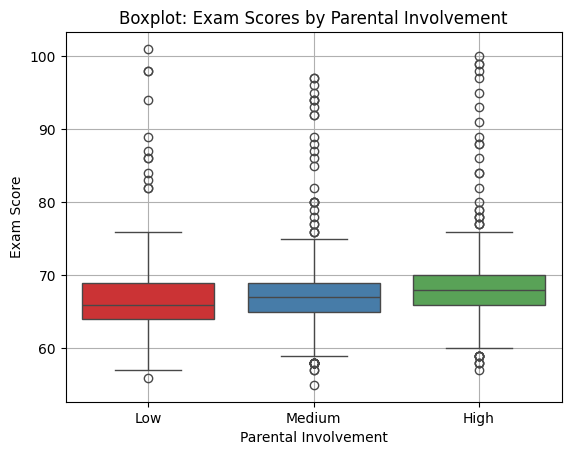

In [ ]:
sns.boxplot(x='Parental_Involvement', y='Exam_Score', hue='Parental_Involvement', data=df,
            palette='Set1', legend=False)
plt.title("Boxplot: Exam Scores by Parental Involvement")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

### Final Conclusion: Parental Involvement and Academic Performance

A one-way ANOVA test was conducted to evaluate whether students' exam scores differ significantly based on the level of parental involvement (Low, Medium, High).

- **F-statistic:** 84.49  
- **P-value:** ~5.88e-37

Since the p-value is far below the significance threshold of 0.05, we **reject the null hypothesis**.

**Conclusion:** There is strong statistical evidence that parental involvement has a significant effect on student exam performance. This suggests that students with higher levels of parental support tend to achieve better academic results.

Visual analysis using violin and boxplots further supports this finding by showing distinct differences in score distributions across the involvement levels.


# **Hypothesis Test 16**

# Teacher Quality and Academic Performance

In [ ]:
df.groupby('Teacher_Quality')['Exam_Score'].mean()


,Exam_Score
Teacher_Quality,
High,67.676939
Low,66.753425
Medium,67.109299


In [ ]:
# Split exam scores by group
low = df[df['Teacher_Quality'] == 'Low']['Exam_Score']
medium = df[df['Teacher_Quality'] == 'Medium']['Exam_Score']
high = df[df['Teacher_Quality'] == 'High']['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 19.639366640457897
P-value: 3.1354286232046435e-09


In [ ]:

if p_value < alpha:
    print("Reject H₀: Teacher quality significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of teacher quality on exam scores.")


Reject H₀: Teacher quality significantly affects exam scores.


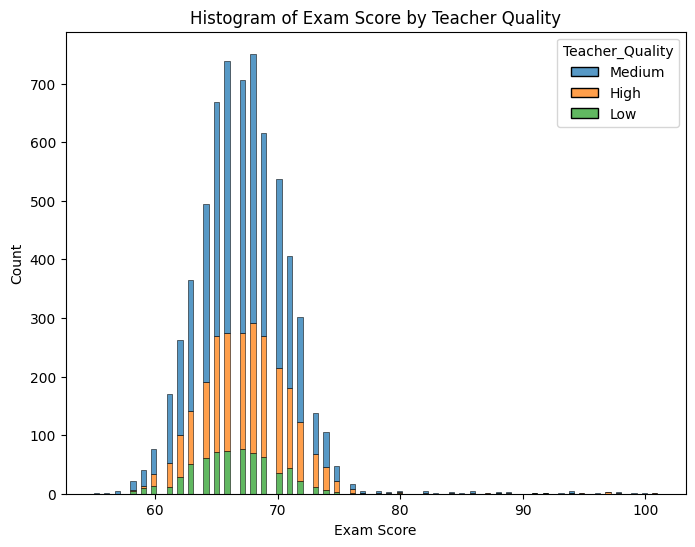

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Exam_Score', hue='Teacher_Quality', multiple='stack', kde=False)
plt.title('Histogram of Exam Score by Teacher Quality')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()


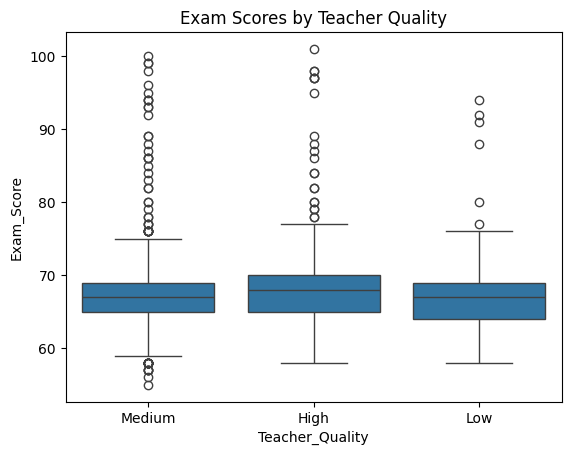

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title("Exam Scores by Teacher Quality")
plt.show()


# **Hypothesis Test 17**

# Peer Influence and Academic Performance

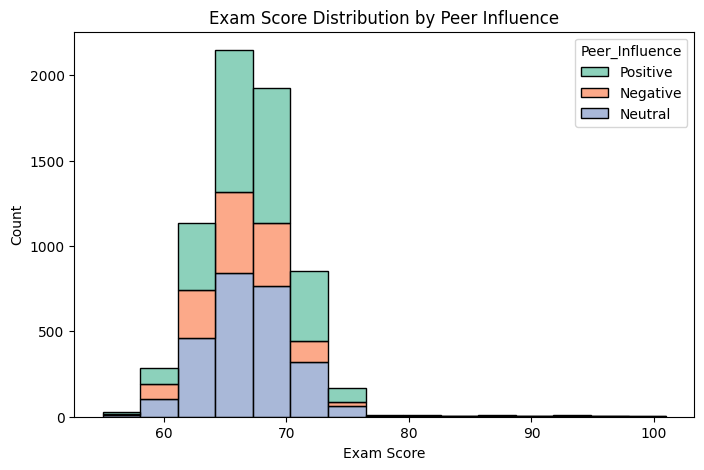

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Exam_Score', hue='Peer_Influence', multiple='stack', palette='Set2', bins=15)
plt.title('Exam Score Distribution by Peer Influence')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

In [ ]:
df.groupby('Peer_Influence')['Exam_Score'].mean()


,Exam_Score
Peer_Influence,
Negative,66.564270
Neutral,67.197917
Positive,67.623199


In [ ]:
#split peer influence into groups
postive = df[df['Peer_Influence'] == 'Postive']['Exam_Score']
neutral = df[df['Peer_Influence'] == 'Nuetral']['Exam_Score']
negative = df[df['Peer_Influence'] == 'Negative']['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 19.639366640457897
P-value: 3.1354286232046435e-09


In [ ]:

if p_value < alpha:
    print("Reject H₀: Peer Influence significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Peer Influence on exam scores.")


# **Hypothesis Test 18**

# Distance from Home and Academic Performance

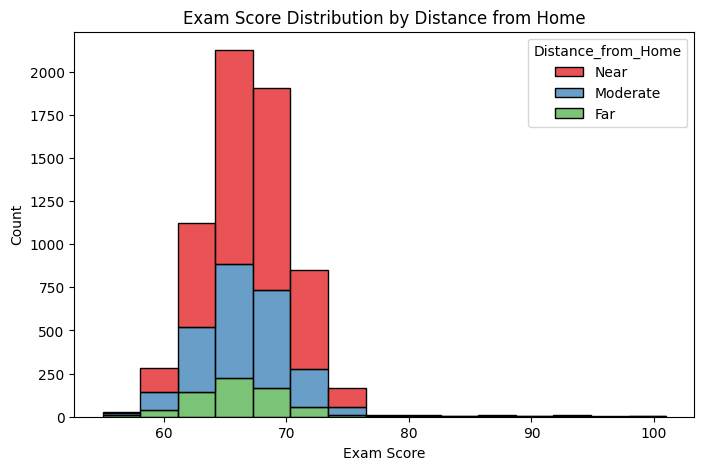

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Exam_Score', hue='Distance_from_Home', multiple='stack', palette='Set1', bins=15)
plt.title('Exam Score Distribution by Distance from Home')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

In [ ]:
df.groupby('Distance_from_Home')['Exam_Score'].mean()


,Exam_Score
Distance_from_Home,
Far,66.457447
Moderate,66.981481
Near,67.512101


In [ ]:
#split peer influence into groups
near = df[df['Peer_Influence'] == 'Near']['Exam_Score']
moderate = df[df['Peer_Influence'] == 'Moderate']['Exam_Score']
far = df[df['Peer_Influence'] == 'Far']['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(low, medium, high)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 19.639366640457897
P-value: 3.1354286232046435e-09


In [ ]:

if p_value < alpha:
    print("Reject H₀: Distance from Home significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Distance from Home on exam scores.")


Reject H₀: Distance from Home significantly affects exam scores.


# **Hypothesis Test 19**

# Parental Education Level and Academic Performance

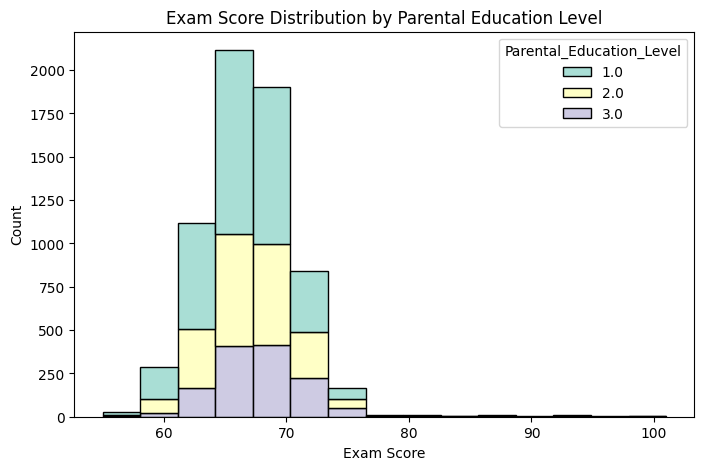

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Exam_Score', hue='Parental_Education_Level', multiple='stack', palette='Set3', bins=15)
plt.title('Exam Score Distribution by Parental Education Level')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

In [ ]:
df.groupby('Parental_Education_Level')['Exam_Score'].mean()


,Exam_Score
Distance_from_Home,
Far,66.457447
Moderate,66.981481
Near,67.512101


In [ ]:
#split parental education level into groups
highschool = df[df['Parental_Education_Level'] == 'High School']['Exam_Score']
college = df[df['Parental_Education_Level'] == 'College']['Exam_Score']
postgraduate = df[df['Parental_Education_Level'] == 'Postgraduate']['Exam_Score']
# Perform one-way ANOVA
f_stat, p_value = f_oneway(highschool, college, postgraduate)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 36.42719633336563
P-value: 1.8521828715621828e-16


In [ ]:

if p_value < alpha:
    print("Reject H₀: Distance from Home significantly affects exam scores.")
else:
    print("Fail to reject H₀: No significant effect of Distance from Home on exam scores.")


Reject H₀: Distance from Home significantly affects exam scores.


In [ ]:
hiiiiiiiiiiiiiiiiiiiiii

Using numeric values